In [70]:
# Assignment 3: Automated Fitting and Analysis

In [71]:
#install packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

data = np.loadtxt("photoelectric.csv", delimiter=',', skiprows=1)

In [72]:
# Problem 1: The Photoelectric Effect

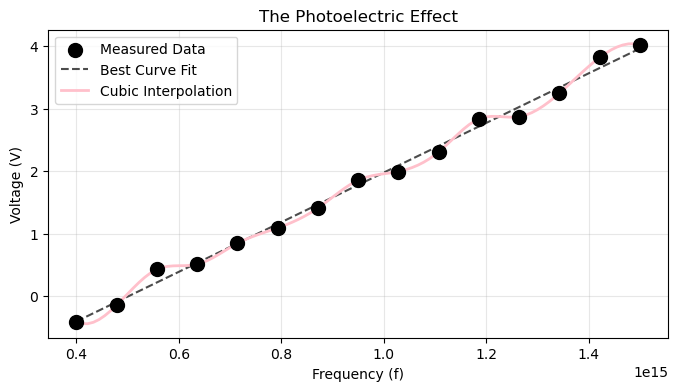

slope (m): 3.964e-15 +-  8.371e-17
intercept (c): -1.987 +-  0.084
plack's constant (h): 6.351e-34 J*s
work function (p𝜙 ± 𝛿𝜙): -1.987e+00 +-  0.084 v


In [73]:
#Frequency and Voltage // Interpolation Function
f = data[:,0]      #Frequency is column 0 // x
v = data[:,1]      #Voltage is column 2  // y
f_linear = interp1d(f, v, kind='linear')
f_cubic = interp1d(f, v, kind='cubic')

#linspace function /// Create a new, dense time array to visualize the "In-Between"
f_dense = np.linspace(np.min(f), np.max(f),100)   #100 plot points
v_linear = f_linear(f_dense)
v_cubic = f_cubic(f_dense)

#Define the Model

def model_linear(f,m,c):
    return m*f+c

#Curve Fit to find Slope and Intercept /// uncertainties
params, pcov = curve_fit(model_linear, f, v)
m, c = params
m_error = np.sqrt(pcov[0,0])       #uncertainty in slope
phi_error = np.sqrt(pcov[1,1])     #uncertainty in intercept

#Define Variables

e = (1.602*(10**-19))
h = m*e
phi = c
                # Voltage formula // slope(m)*frequency(f)+intercept(c)
                # h is Planck's constant
                # e is the elementary charge (1.602 × 10^-19 C)
                # ϕ is the work function of the metal (in Volts)
#Best Fit Curve Line
v_fit = model_linear(f_dense, m, c)


#Plotting the Graph
plt.figure(figsize=(8, 4))
plt.scatter(f, v, color='black', s=100, label='Measured Data', zorder=5)
plt.plot(f_dense, v_fit, '--', color = 'black', label='Best Curve Fit', alpha=0.7)
plt.plot(f_dense, v_cubic, '-', linewidth=2, color = 'pink', label='Cubic Interpolation')

plt.title("The Photoelectric Effect")
plt.xlabel("Frequency (f)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Print Results
print(f"slope (m): {m:.3e} +- {m_error: .3e}")
print(f"intercept (c): {c:.3f} +- {phi_error: .3f}")
print(f"plack's constant (h): {h:.3e} J*s")
print(f"work function (p𝜙 ± 𝛿𝜙): {phi:.3e} +- {phi_error: .3f} v")

In [74]:
# The metal in question is likely Cesium.

In [75]:
# Problem 2: Radioactive Decay (Non-Linear vs. Linearization)

In [76]:
# Load Dataset
data = np.loadtxt("decay_data.csv", delimiter=',', skiprows=1)
t = data[:,0]
N = data[:,1]

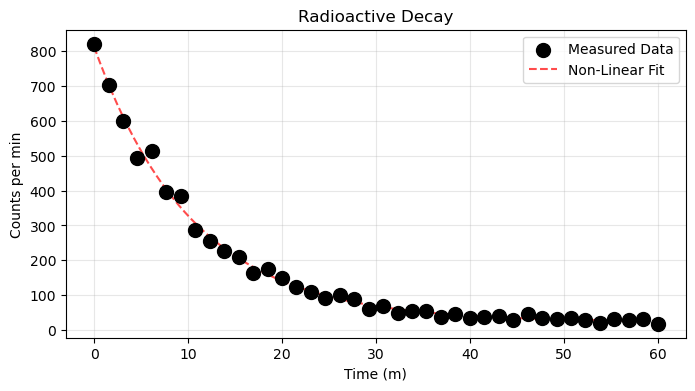

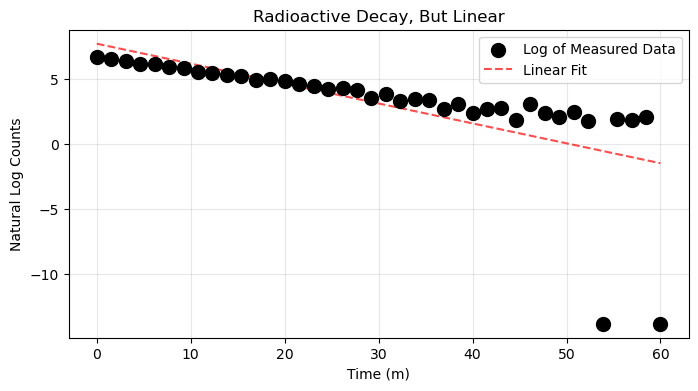

In [77]:
# Method A: The Non-Linear Fit
# Define the Function    // N(t) = N0 e^-lambda*t + background
def decay_model(t, N0, lam, bg):
    return N0*np.exp(-lam*t)+bg

# Initial Guesses
N0_guess = N[0] - np.min(N)
lam_guess = 0.1
bg_guess = np.min(N)
p0_guess = [N0_guess, lam_guess, bg_guess]

# Curve Fit
params, pcov = curve_fit(decay_model, t, N, p0_guess)
N0_fit, lam_fit, bg_fit = params
N0_err, lam_err, bg_err = np.sqrt(np.diag(pcov))

# Half-Life
t_half = np.log(2)/lam_fit
t_half_err = (lam_err/lam_fit**2)*(np.log(2))

# Method A Plot
t_dense = np.linspace(np.min(t), np.max(t), 200)
N_fit = decay_model(t_dense, N0_fit, lam_fit, bg_fit)
plt.figure(figsize=(8, 4))
plt.scatter(t, N, color='black', s=100, label='Measured Data', zorder=5)
plt.plot(t_dense, N_fit, '--', color = 'red', label='Non-Linear Fit', alpha=0.7)

plt.title("Radioactive Decay")
plt.xlabel("Time (m)")
plt.ylabel("Counts per min")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Method B: The Linearization Check
#Create a new array
log_N = np.log(np.clip(N-bg_fit, 1e-6, None))

def linear_model(x, m, c):
    return m*x+c
params_lin, pcov_lin = curve_fit(linear_model, t, log_N)
m_lin, c_lin = params_lin
m_err_lin, c_err_lin = np.sqrt(np.diag(pcov_lin))

# Half-Life
t_half_lin = np.log(2)/(-m_lin)

# Comparison Plot
t_dense = np.linspace(np.min(t), np.max(t), 200)
log_fit = linear_model(t_dense, m_lin, c_lin)
plt.figure(figsize=(8, 4))
plt.scatter(t, log_N, color='black', s=100, label='Log of Measured Data', zorder=5)
plt.plot(t_dense, log_fit, '--', color = 'red', label='Linear Fit', alpha=0.7)

plt.title("Radioactive Decay, But Linear")
plt.xlabel("Time (m)")
plt.ylabel("Natural Log Counts")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [78]:
# Question i
# How do your parameters compare for the two fits? Which one is better? Why?

print('Method A is more accurate because it accounts for background, whereas Method B does not.')

Method A is more accurate because it accounts for background, whereas Method B does not.


In [79]:
# Question ii
# Look at your log-plot. Does it look like a straight line for the whole time? Where does it fail, and why? How could you make your fit better for this case? 

print('The log-plot does not maintain as a straight line. It begins to fail around the 30-40 minute mark. You can improve this fit by making it a non-linear fit.')

The log-plot does not maintain as a straight line. It begins to fail around the 30-40 minute mark. You can improve this fit by making it a non-linear fit.


In [80]:
# Problem 3: The Truth is in the Residuals

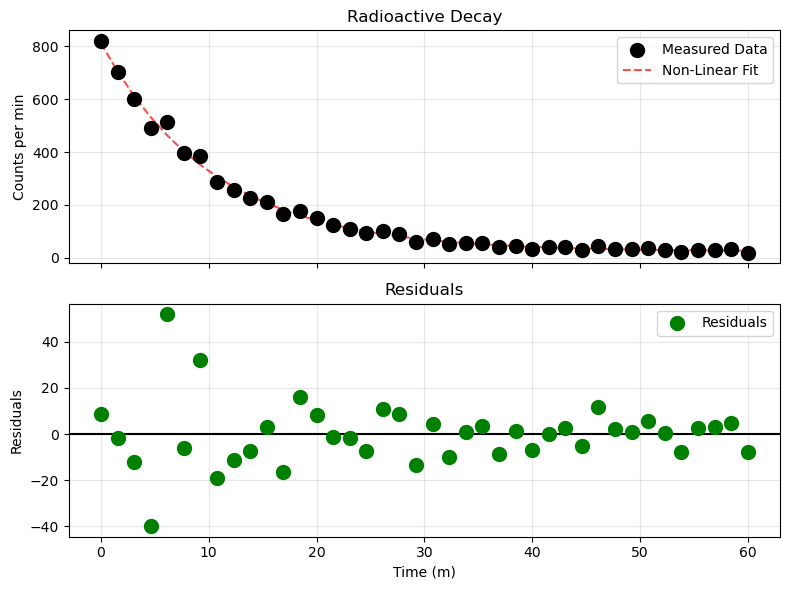

In [91]:
# 2 Panel Plot
residuals = N - decay_model(t, N0_fit, lam_fit, bg_fit)
N_fit = decay_model(t, N0_fit, lam_fit, bg_fit)
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex =True)


# Plot the Top
ax[0].scatter(t, N, color='black', s=100, label='Measured Data', zorder=5)
ax[0].plot(t, decay_model(t, N0_fit, lam_fit, bg_fit), '--', color = 'red', label='Non-Linear Fit', alpha=0.7)
ax[0].set_title("Radioactive Decay")
ax[0].set_ylabel("Counts per min")
ax[0].legend()
ax[0].grid(True, alpha=0.3)


# Plot the Bottom
ax[1].scatter(t, residuals, color='green', s=100, label='Residuals', zorder=5)
ax[1].axhline(y=0, color='black')
ax[1].set_title("Residuals")
ax[1].set_xlabel("Time (m)")
ax[1].set_ylabel("Residuals")
ax[1].legend()
ax[1].grid(True, alpha=0.3)


#Plot together
plt.tight_layout()
plt.show()

In [93]:
# Question
# Question: Do the residuals look like random noise (a cloud centered on zero), or do they have a "shape" (like a wave or a U-shape)? What does this tell you about your model? 

print('The residuals look like a half letter U. This tells me that the model has a negative slope and there is a lot of noise.')

In [ ]:
# Problem 4: Unknown Physics (Polynomial Approximation)

In [94]:
# Load Dataset
data = np.loadtxt("mystery_data.csv", delimiter=',', skiprows=1)
x = data[:,0]
y = data[:,1]

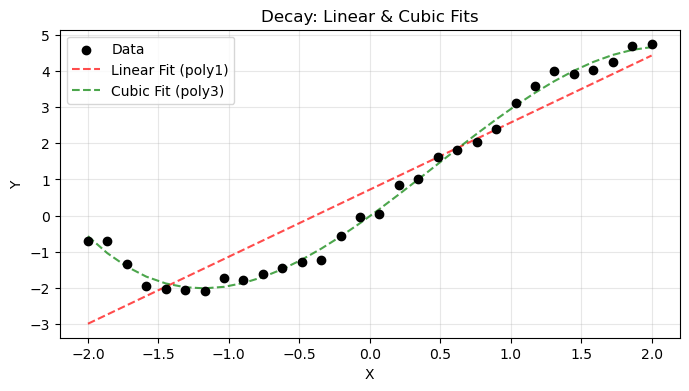

In [97]:
#Define Models
def poly1(x, a, b):
    return a*x+b
def poly3(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d


# Fit the Models
params_linear, _ = curve_fit(poly1, x, y)
params_cubic, _ = curve_fit(poly3, x, y)

# Plot: Show the Data, the Linear Fit, and the Cubic Fit on one graph.

y_linear_fit = poly1(x, *params_linear)
y_cubic_fit = poly3(x, *params_cubic)


plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='black', label='Data', zorder=5)
plt.plot(x, y_linear_fit, '--', color = 'red', label='Linear Fit (poly1)', alpha=0.7)
plt.plot(x, y_cubic_fit, '--', color = 'green', label='Cubic Fit (poly3)', alpha=0.7)

plt.title("Decay: Linear & Cubic Fits")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [98]:
# Question: How many terms do you think you need to capture the data?
print('I think there needs 3 terms to capture the data. The cubic graph follows the data closer than the linear fit.')

I think there needs 3 terms to capture the data. The cubic graph follows the data closer than the linear fit.
